In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.dates
import seaborn as sns
import string
%matplotlib inline
import os
import datetime 
import emoji
from tqdm import tqdm_notebook

In [127]:
df = pd.read_csv('allMsgs.csv', index_col = 0,  encoding = 'utf-8-sig')

In [128]:
df.head()

,Sender,Content,Date and time,Label
1,Me,Jao,2018-04-23 11:33:00,Me
2,Me,Ako sam ista manje ocekivao...,2018-04-23 11:33:00,Me
3,Me,Bajrambarecola,2018-06-15 06:23:00,Me
4,Me,Sve najbolje,2018-06-15 06:23:00,Me
5,Me,😉,2018-06-15 06:23:00,Me


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340552 entries, 1 to 328225
Data columns (total 4 columns):
Sender           340552 non-null object
Content          340552 non-null object
Date and time    340552 non-null object
Label            340552 non-null object
dtypes: object(4)
memory usage: 13.0+ MB


In [115]:
df.describe()

,Sender,Content,Date and time,Label
count,340552,340552,340552,340552
unique,28,149718,183401,7
top,Me,Ok,2019-04-08 20:43:43,Me
freq,152796,2055,20,152796


In [129]:
df['Date and time'] = pd.to_datetime(df['Date and time'])

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340552 entries, 1 to 328225
Data columns (total 4 columns):
Sender           340552 non-null object
Content          340552 non-null object
Date and time    340552 non-null datetime64[ns]
Label            340552 non-null object
dtypes: datetime64[ns](1), object(3)
memory usage: 13.0+ MB


In [106]:
df.describe()

,Sender,Content,Date and time,Label
count,340552,340552,340552,340552
unique,28,149718,183401,7
top,Me,Ok,2019-04-08 20:43:43,Me
freq,152796,2055,20,152796
first,NaN,NaN,2018-03-30 14:35:23,NaN
last,NaN,NaN,2019-05-10 12:42:57,NaN


In [107]:
df['Date and time'].dt.hour.value_counts().head()

22    34420
23    33800
21    27169
11    23396
12    23079
Name: Date and time, dtype: int64

In [130]:
emojiLst = []
for i in df['Content']:    
    if type(i) == float:
        continue
    for j in i:
        if j in emoji.UNICODE_EMOJI:
                emojiLst.append(j)

In [131]:
emojis = pd.DataFrame(emojiLst)

In [132]:
emojis[0].value_counts().head()

™    182
😂    108
😁     93
😆     46
😘     35
Name: 0, dtype: int64

In [31]:
sentMsgs = df[df['Label'] == 'Me']
receivedMsgs = df[df['Label'] != 'Me']

In [33]:
sentEmojiLst = []
for i in sentMsgs['Content']:    
    if type(i) == float:
        continue
    for j in i:
        if j in emoji.UNICODE_EMOJI:
                sentEmojiLst.append(j)
                
sentEmojis = pd.DataFrame(sentEmojiLst)

In [38]:
sentEmojis[0].value_counts().head()

™    97
👍    32
😘    16
😉    12
😆    11
Name: 0, dtype: int64

In [35]:
receivedEmojiLst = []
for i in receivedMsgs['Content']:    
    if type(i) == float:
        continue
    for j in i:
        if j in emoji.UNICODE_EMOJI:
                receivedEmojiLst.append(j)
                
receivedEmojis = pd.DataFrame(receivedEmojiLst)

In [36]:
receivedEmojis[0].value_counts().head()

😂    99
™    85
😁    85
😆    35
❤    25
Name: 0, dtype: int64

Text(0.5, 0, 'emojis')

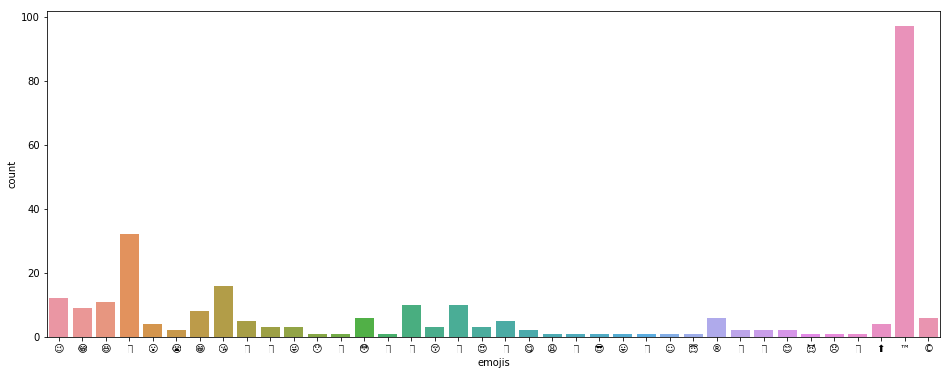

In [43]:
plt.figure(figsize=(16, 6))
ax = sns.countplot( sentEmojis[0])
ax.set_xlabel("emojis")

Text(0.5, 0, 'emojis')

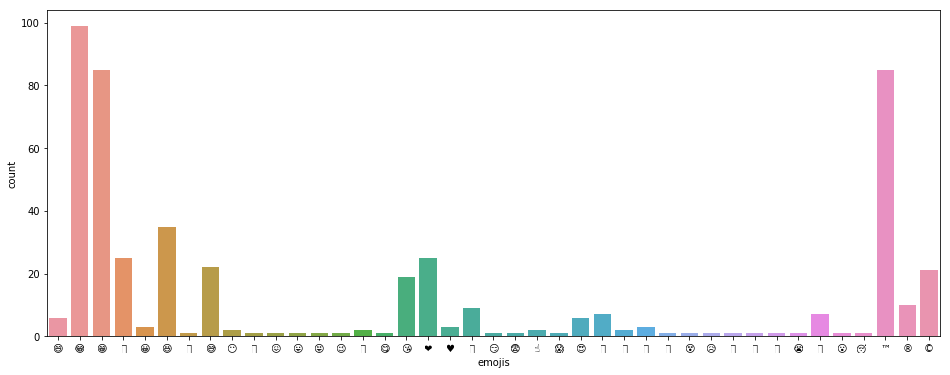

In [62]:
plt.figure(figsize=(16, 6))
ax = sns.countplot( receivedEmojis[0])
ax.set_xlabel("emojis")

In [76]:
emj = df[df['Content'].isin(emoji.UNICODE_EMOJI)]

AttributeError: 'dict' object has no attribute 'isin'

In [69]:
emj.Content.value_counts().head()

⚽    28
😁    21
😘    15
💪    14
😂    12
Name: Content, dtype: int64

Text(0.5, 0, 'emojis')

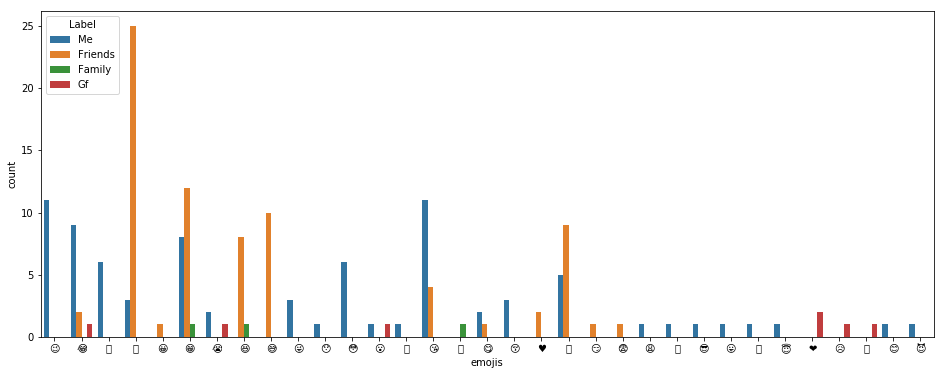

In [56]:
plt.figure(figsize=(16, 6))
ax = sns.countplot( emojis['Content'], hue=emojis['Label'])
ax.set_xlabel("emojis")